In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from PIL import Image

## Defining some global plot parameters

In [2]:
matplotlib.rc('figure', figsize=(6,6))
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

## First look at the training data

In [3]:
# absolute path to train images
TRAIN_PATH = "../dataset/training"

# printing folders with different classes
os.listdir(TRAIN_PATH)

['forest', 'buildings', '.DS_Store', 'glacier', 'street', 'mountain', 'sea']

In [4]:
def create_dataset(path):
    """
    Function to create a dictionary with each
    class as the key and a list of all img paths
    for this class
    :param path: path to training images
    :return: dictionary with img paths per class
    """
    
    data_dict = dict()
    
    for folder in os.listdir(path):
        if folder[0] != '.':
            
            # create a list of all combined image paths
            # for each class (key-value-pair)
            data_dict[folder] = [
                os.path.join(path, folder, img) for img in os.listdir(os.path.join(path, folder))
            ]
            
    return data_dict

In [5]:
data = create_dataset(TRAIN_PATH)

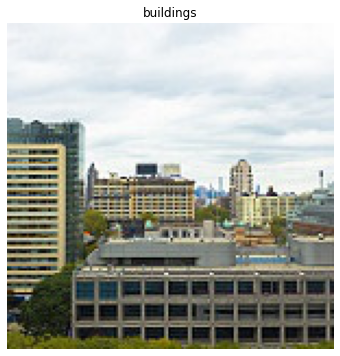

In [6]:
# get a random image
random_class = np.random.choice(list(data.keys()))
random_img = np.random.randint(len(data.get(random_class)))
image = Image.open(data[random_class][random_img])

# display the random image
plt.imshow(image)
plt.title(random_class)
plt.axis('off')
plt.show()

In [7]:
# check the size of the images
image = np.array(image)
image.shape

(150, 150, 3)

## Taking a look at class distribution

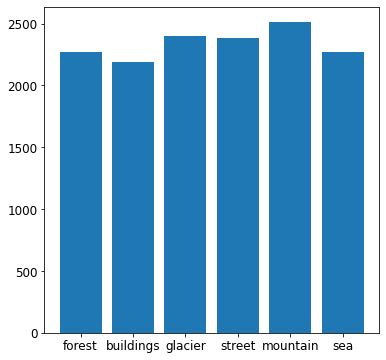

In [8]:
# get list of the number of elements in each class (folder)
class_sizes = [len(values) for key, values in data.items()]

# visualisation of class distribution
plt.bar(list(data.keys()), class_sizes)
plt.show()

Since the classes are equaliy distributes, accuracy and roc would be an appropriate measure

### Results and extracted information from this short exploratory data analysis (EDA):

- image size: 150x150x3 (RGB)
- class distribution: are almost equally distributed
- possible evaluation metrics: accuracy or roc (both possible)
- number of classes: 6